In [40]:
import osmnx as ox
import pandas as pd
import numpy as np
import geopandas as gpd 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import h3
from shapely.geometry import Polygon

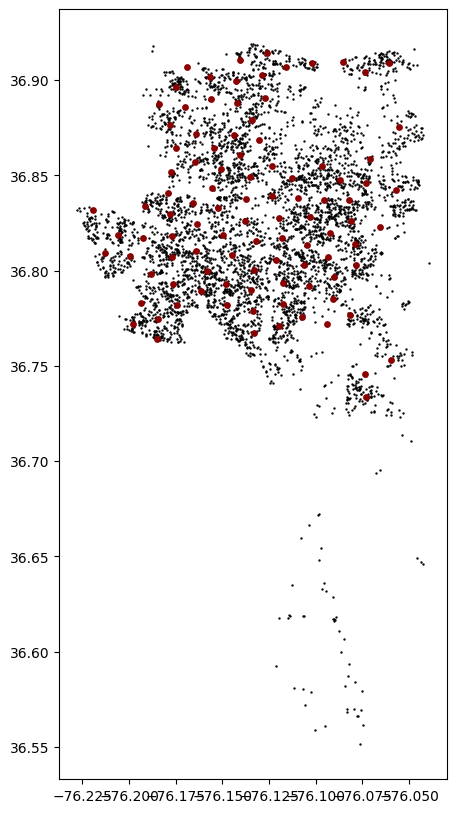

In [41]:
test_poi_df_total = pd.read_csv('test_poi_df_total.csv')
candidate = np.load('build_num_choose_100_set_10.npy')[0]
deployment_decision_100 = np.load('deployment_decision_100_set_10_dist_1.2.npy').astype(np.int64)[0]

plt.figure(figsize=(5, 10))
plt.scatter( test_poi_df_total.iloc[candidate].lon, test_poi_df_total.iloc[candidate].lat, c='black', s=0.5, alpha=1.0)
plt.scatter( test_poi_df_total.iloc[deployment_decision_100].lon, test_poi_df_total.iloc[deployment_decision_100].lat, marker='o', c='darkred', s=15)

行政區背景已繪製


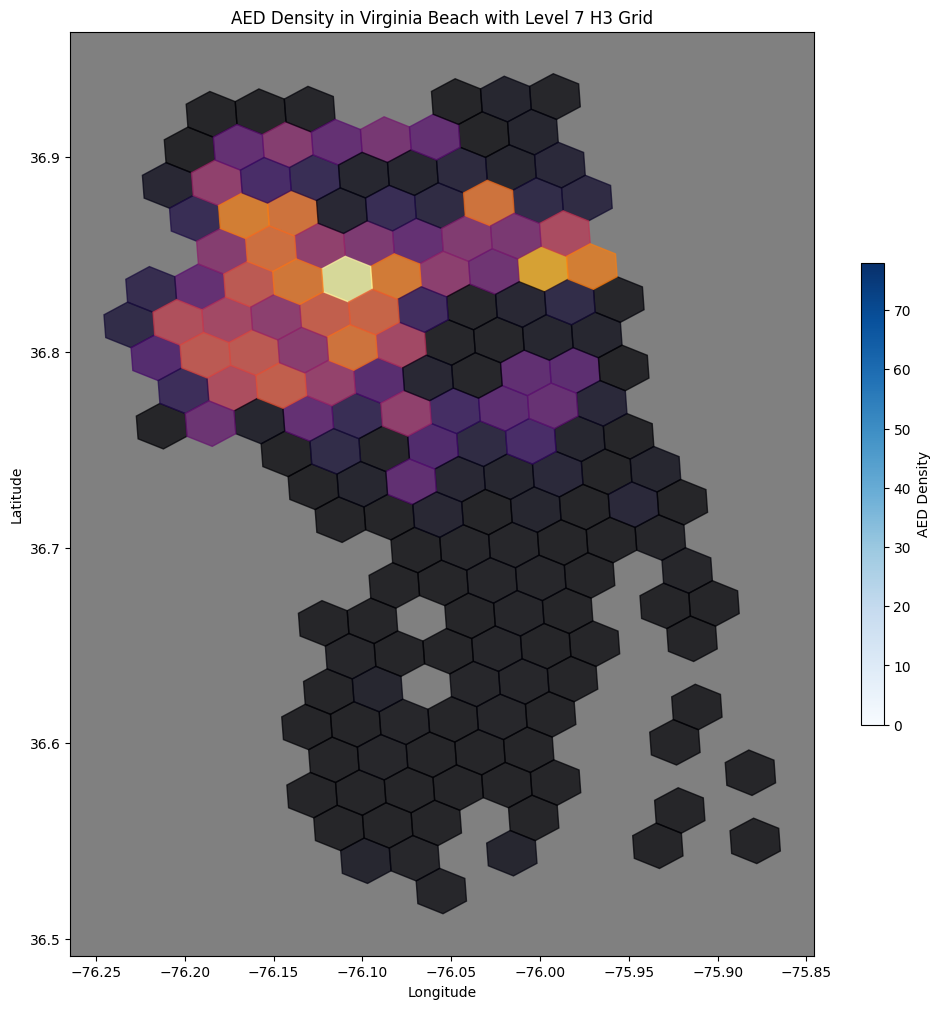

In [42]:
# Step 1: 讀取網格數據
h3_l7_df = pd.read_csv('h3_l7_df_new.csv')



# # Step 2: 獲取行政區域資料
# districts = ox.geocode_to_gdf([
#     'Bayside, Virginia Beach, Virginia, USA',
#     'Princess Anne, Virginia Beach, Virginia, USA',
#     'Kempsville, Virginia Beach, Virginia, USA',
#     'Oceanfront, Virginia Beach, Virginia, USA',
#     'Lynnhaven, Virginia Beach, Virginia, USA'
# ])

districts = ox.geocode_to_gdf([
    'Virginia Beach, Virginia, USA',
])



# Step 3: 繪製行政區背景
fig, ax = plt.subplots(figsize=(12, 12))

print('行政區背景已繪製')

# Step 4: 計算各網格內的 AED 密度
density = h3_l7_df[['id', 'ohca']]

# Step 5: 繪製每個網格
for index, row in density.iterrows():
    # 將 H3 索引轉換為多邊形
    boundary = h3.h3_to_geo_boundary(row['id'], geo_json=True)
    polygon = Polygon(boundary)
    # 根據密度決定顏色
    color_norm = mcolors.Normalize(vmin=density['ohca'].min(), vmax=density['ohca'].max())
    color = plt.cm.inferno(color_norm(row['ohca']))
    ax.fill(*zip(*polygon.exterior.coords), color=color, alpha=0.7)

# Step 6: 創建並顯示顏色條
norm = mcolors.Normalize(vmin=density['ohca'].min(), vmax=density['ohca'].max())
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=ax, orientation='vertical', label='AED Density', shrink=0.5)

# Step 7: 設定地圖的細節
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('AED Density in Virginia Beach with Level 7 H3 Grid')
ax.set_facecolor('grey')

# 顯示地圖
plt.show()


# fig.savefig('AED_Shenzhen.png')

# Train y head

In [43]:
train_index=[]
test_index=[]
for i in range(0,h3_l7_df.shape[0]):
    geo_location = h3.h3_to_geo(h3_l7_df.iloc[i]['id'])

    if (geo_location[1]) > (-76.05): #把經度大於-76.05的 當train (東邊是train)
        train_index.append(i)
    else:
        test_index.append(i)

# 分割訓練集和測試集
train_h3_l7_df = h3_l7_df.iloc[train_index]
test_h3_l7_df = h3_l7_df.iloc[test_index]


districts = ox.geocode_to_gdf([
    'Virginia Beach, Virginia, USA',
])


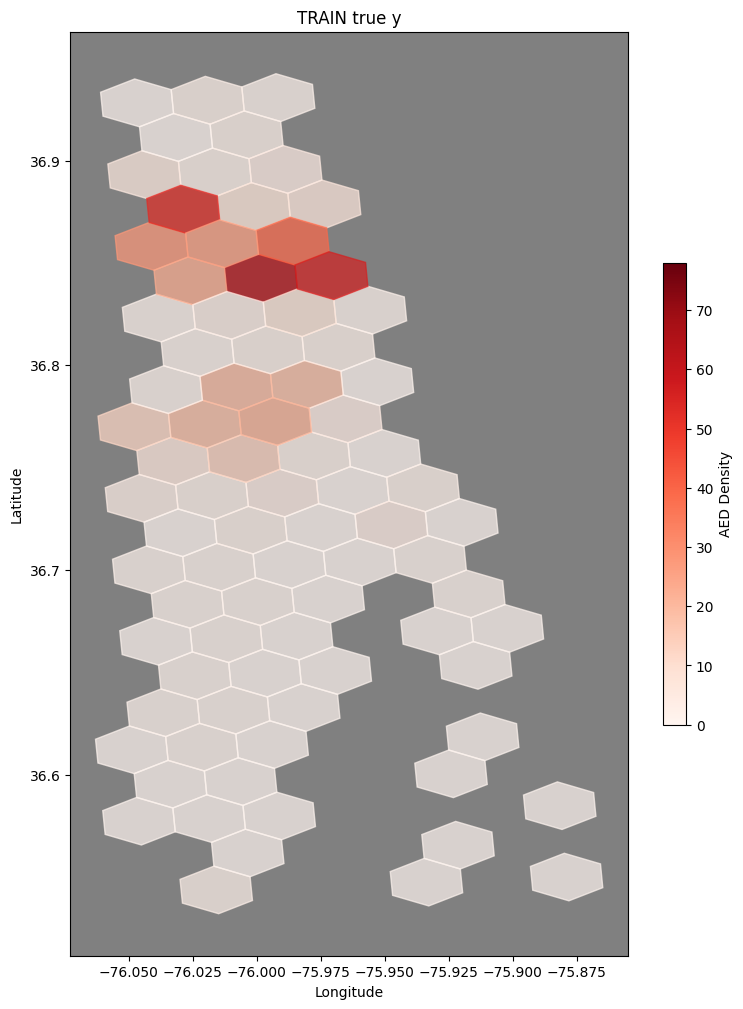

In [44]:
# Step 3: 繪製行政區背景
fig, ax = plt.subplots(figsize=(9, 12))

# Step 4: 計算各網格內的 AED 密度
density_train = train_h3_l7_df[['id', 'ohca']]

# Step 5: 繪製每個網格
for index, row in density_train.iterrows():
    # 將 H3 索引轉換為多邊形
    boundary = h3.h3_to_geo_boundary(row['id'], geo_json=True)
    polygon = Polygon(boundary)
    # 根據密度決定顏色
    color_norm = mcolors.Normalize(vmin=density['ohca'].min(), vmax=density['ohca'].max())
    color = plt.cm.Reds(color_norm(row['ohca']))
    ax.fill(*zip(*polygon.exterior.coords), color=color, alpha=0.7)

# Step 6: 創建並顯示顏色條
norm = mcolors.Normalize(vmin=density['ohca'].min(), vmax=density['ohca'].max())
sm = plt.cm.ScalarMappable(cmap=plt.cm.Reds, norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=ax, orientation='vertical', label='AED Density', shrink=0.5)

# Step 7: 設定地圖的細節
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('TRAIN true y')
ax.set_facecolor('grey')

# 顯示地圖
plt.show()



# Test y head

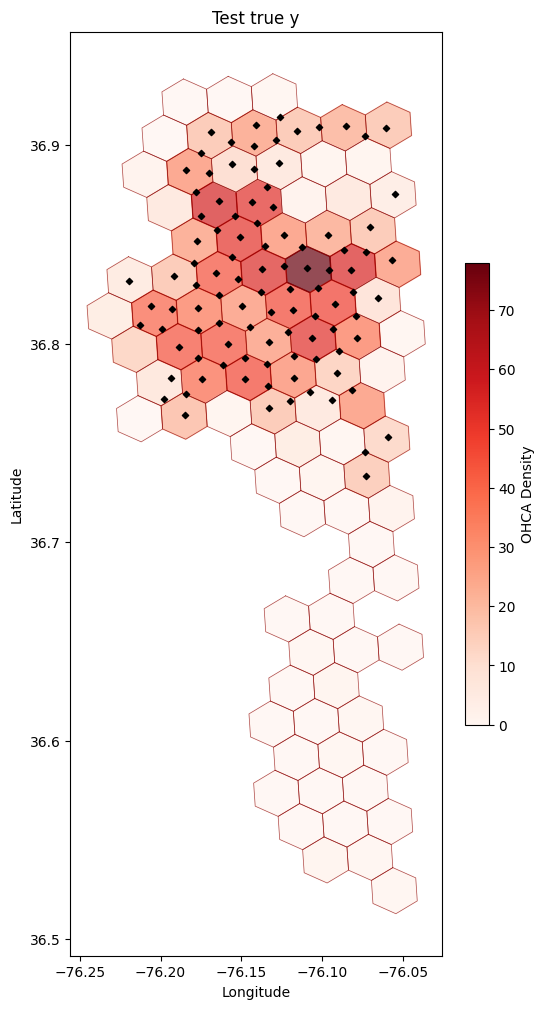

In [45]:
# Step 3: 繪製行政區背景
fig, ax = plt.subplots(figsize=(6, 12))

# Step 4: 計算各網格內的 AED 密度
density_test = test_h3_l7_df[['id', 'ohca']]

# Step 5: 繪製每個網格
for index, row in density_test.iterrows():
    # 將 H3 索引轉換為多邊形
    boundary = h3.h3_to_geo_boundary(row['id'], geo_json=True)
    polygon = Polygon(boundary)
    # 根據密度決定顏色
    color_norm = mcolors.Normalize(vmin=density['ohca'].min(), vmax=density['ohca'].max())
    color = plt.cm.Reds(color_norm(row['ohca']))
    ax.fill(*zip(*polygon.exterior.coords), color=color, alpha=0.7)
    # 繪製多邊形邊界（黑色）
    x, y = zip(*polygon.exterior.coords)
    ax.plot(x, y, color='darkred', linewidth=0.5, alpha= 0.7)  # 邊界為黑色，線寬0.5

# Step 6: 創建並顯示顏色條
norm = mcolors.Normalize(vmin=density['ohca'].min(), vmax=density['ohca'].max())
sm = plt.cm.ScalarMappable(cmap=plt.cm.Reds, norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=ax, orientation='vertical', label='OHCA Density', shrink=0.5)

# plt.scatter( test_poi_df_total.iloc[candidate].lon, test_poi_df_total.iloc[candidate].lat, c='black', s=0.5, alpha=1.0)
plt.scatter(
    test_poi_df_total.iloc[deployment_decision_100].lon,
    test_poi_df_total.iloc[deployment_decision_100].lat,
    marker='D', #############
    c='black',
    s=10,  # 大小可調整
    # edgecolors='white',  # 白色邊框
    # linewidths=1,       # 調整邊框寬度
    zorder=3            # 提高散點的堆疊順序
)

# Step 7: 設定地圖的細節
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Test true y')
ax.set_facecolor('white')

# 顯示地圖
# plt.show()
plt.savefig('plot_example.pdf', format='pdf')

In [46]:
zoom_index=[]
for i in range(0,test_h3_l7_df.shape[0]):
    geo_location = h3.h3_to_geo(test_h3_l7_df.iloc[i]['id'])
    if (geo_location[1]) < (-76.07) and (geo_location[1]) > (-76.16) and(geo_location[0]) < (36.85) and (geo_location[0]) > (36.8): #把經度大於-76.05的 當train (東邊是train)
        zoom_index.append(i)

# 分割訓練集和測試集
zoom_in_train_h3_l7_df = test_h3_l7_df.iloc[zoom_index]

can_index = []
for i in candidate:
    if test_poi_df_total.iloc[int(i)]['h3_l7'] in list(zoom_in_train_h3_l7_df.id):
        can_index.append(i)

can_index = np.array(can_index)
can_index = can_index[np.random.choice(1230, 70)]

cho_index = []
for i in deployment_decision_100:
    if test_poi_df_total.iloc[int(i)]['h3_l7'] in list(zoom_in_train_h3_l7_df.id):
        cho_index.append(i)

# filtered_poi_df_total = test_poi_df_total.iloc[can_index]
# for i in range(0,test_poi_df_total):
#     if test_poi_df_total.iloc[i]['h3_l7'] in zoom_in_train_h3_l7_df.id:
#         zoom_test_poi_df_total = test_poi_df_total.iloc[i]['h3_l7']


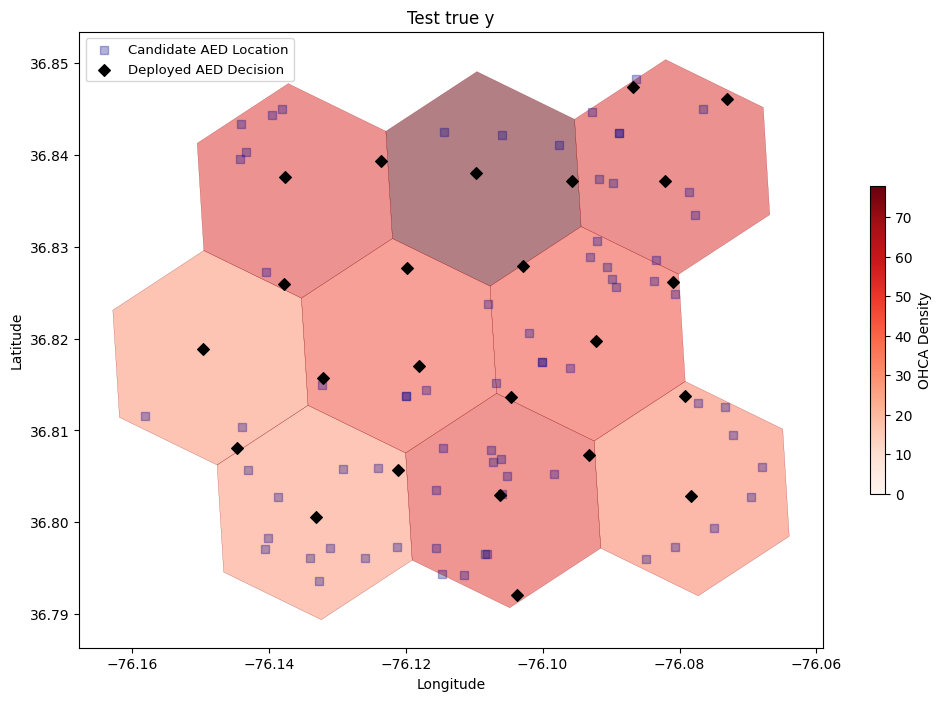

In [47]:

fig, ax = plt.subplots(figsize=(12, 8))

# Step 4: 計算各網格內的 AED 密度
density_test = zoom_in_train_h3_l7_df[['id', 'ohca']]

# Step 5: 繪製每個網格
for index, row in density_test.iterrows():
    # 將 H3 索引轉換為多邊形
    boundary = h3.h3_to_geo_boundary(row['id'], geo_json=True)
    polygon = Polygon(boundary)
    # 根據密度決定顏色
    color_norm = mcolors.Normalize(vmin=density['ohca'].min(), vmax=density['ohca'].max())
    color = plt.cm.Reds(color_norm(row['ohca']))
    ax.fill(*zip(*polygon.exterior.coords), color=color, alpha=0.5 , linewidth=0)
    # 繪製多邊形邊界（darkred）
    x, y = zip(*polygon.exterior.coords)
    ax.plot(x, y, color='darkred', linewidth=0.2, alpha= 0.7)  # 邊界為黑色，線寬0.5

# Step 6: 創建並顯示顏色條
norm = mcolors.Normalize(vmin=density['ohca'].min(), vmax=density['ohca'].max())
sm = plt.cm.ScalarMappable(cmap=plt.cm.Reds, norm=norm)
sm.set_array([])

# Add colorbar
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', label='OHCA Density', shrink=0.5)

# Scatter plot for test points
test_points = ax.scatter(test_poi_df_total.iloc[can_index].lon, test_poi_df_total.iloc[can_index].lat, c='darkblue', s=35, alpha=0.3 , marker=',', label='Candidate AED Location') 

# Scatter plot for chosen points
chosen_points = ax.scatter(
    test_poi_df_total.iloc[cho_index].lon,
    test_poi_df_total.iloc[cho_index].lat,
    marker='D',
    c='black',
    s=35,  # size adjustable
    zorder=3,  # Higher stacking order
    label='Deployed AED Decision'
)

# Step 7: 設定地圖的細節
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Test true y')
ax.set_facecolor('white')

# Step 8: Add legend
ax.legend(loc='upper left', fontsize=9.5)

# Show plot or save
plt.savefig('plot_example.pdf', format='pdf')
# plt.show()


In [48]:
h3_l7_df['ohca']

0       1
1       1
2       2
3       0
4       0
       ..
172     2
173    20
174     1
175     2
176     0
Name: ohca, Length: 177, dtype: int64

In [63]:
cho_h3_l7_df

,id,place_of_worship,grave_yard,school,post_office,childcare,university,courthouse,fire_station,library,...,warehouse,sports_centre,detached,boathouse,barn,riding_hall,construction,ship,ruins,ohca
58,872af0c92ffffff,4,0,5,2,0,0,3,1,1,...,0,0,0,0,0,0,0,0,0,15
91,872af6225ffffff,3,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,32
92,872af6228ffffff,1,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20
93,872af6229ffffff,7,0,5,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,37
94,872af622affffff,2,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
95,872af622bffffff,6,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,41
96,872af622cffffff,2,0,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,29
97,872af622dffffff,5,0,4,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,45
102,872af6260ffffff,1,2,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
104,872af6262ffffff,5,1,2,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,20


In [65]:
cho_h3_l7_df_2.ohca

0      1
1      1
2      2
3      0
4      0
      ..
170    2
172    2
174    1
175    2
176    0
Name: ohca, Length: 131, dtype: int64

In [66]:
cho_h3_l7 = test_poi_df_total.iloc[deployment_decision_100]['h3_l7']
cho_h3_l7_df = test_h3_l7_df[test_h3_l7_df['id'].isin(cho_h3_l7)]
min(cho_h3_l7_df.ohca)

1

In [75]:
cho_h3_l7_df_2 = test_h3_l7_df[test_h3_l7_df['id'].isin(cho_h3_l7)==False]
cho_h3_l7_df_2.iloc[np.argmax(cho_h3_l7_df_2.ohca)].id

'872af620dffffff'

In [79]:
h3.h3_to_geo('872af620dffffff')[0]

36.79711896900803

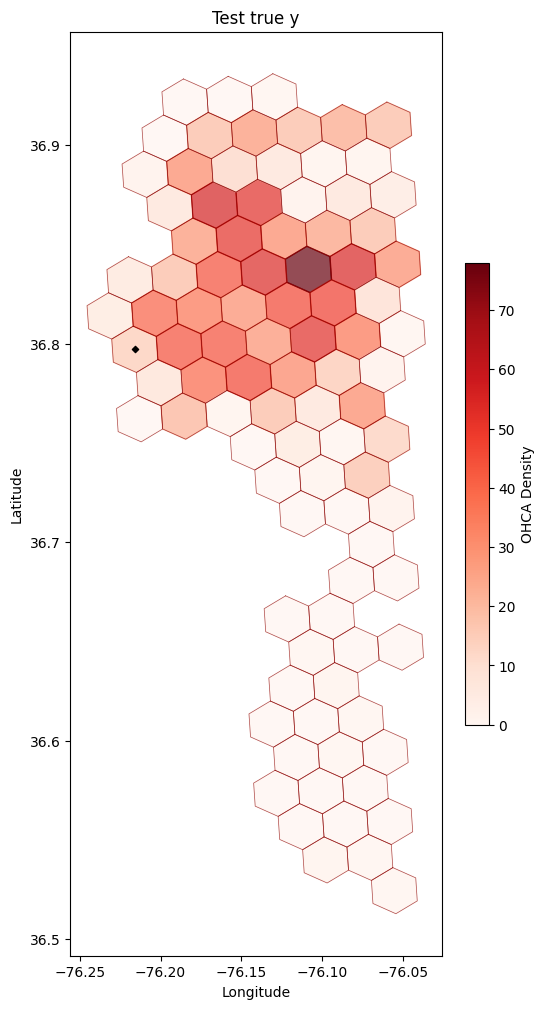

In [83]:
# Step 3: 繪製行政區背景
fig, ax = plt.subplots(figsize=(6, 12))

# Step 4: 計算各網格內的 AED 密度
density_test = test_h3_l7_df[['id', 'ohca']]

# Step 5: 繪製每個網格
for index, row in density_test.iterrows():
    # 將 H3 索引轉換為多邊形
    boundary = h3.h3_to_geo_boundary(row['id'], geo_json=True)
    polygon = Polygon(boundary)
    # 根據密度決定顏色
    color_norm = mcolors.Normalize(vmin=density['ohca'].min(), vmax=density['ohca'].max())
    color = plt.cm.Reds(color_norm(row['ohca']))
    ax.fill(*zip(*polygon.exterior.coords), color=color, alpha=0.7)
    # 繪製多邊形邊界（黑色）
    x, y = zip(*polygon.exterior.coords)
    ax.plot(x, y, color='darkred', linewidth=0.5, alpha= 0.7)  # 邊界為黑色，線寬0.5

# Step 6: 創建並顯示顏色條
norm = mcolors.Normalize(vmin=density['ohca'].min(), vmax=density['ohca'].max())
sm = plt.cm.ScalarMappable(cmap=plt.cm.Reds, norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=ax, orientation='vertical', label='OHCA Density', shrink=0.5)

# plt.scatter( test_poi_df_total.iloc[candidate].lon, test_poi_df_total.iloc[candidate].lat, c='black', s=0.5, alpha=1.0)
plt.scatter(
    h3.h3_to_geo('872af620dffffff')[1],
    h3.h3_to_geo('872af620dffffff')[0],
    marker='D', #############
    c='black',
    s=10,  # 大小可調整
    # edgecolors='white',  # 白色邊框
    # linewidths=1,       # 調整邊框寬度
    zorder=3            # 提高散點的堆疊順序
)

# Step 7: 設定地圖的細節
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Test true y')
ax.set_facecolor('white')

# 顯示地圖
# plt.show()
plt.savefig('plot_example.pdf', format='pdf')

In [82]:
h3.h3_to_geo('872af620dffffff')[1],
h3.h3_to_geo('872af620dffffff')[0],

(36.79711896900803, -76.21591127072564)

In [81]:
test_poi_df_total.iloc[deployment_decision_100].lon

81075   -76.103718
65861   -76.188459
81279   -76.117472
68441   -76.176577
36439   -76.118125
           ...    
14462   -76.127049
6047    -76.142285
54790   -76.199281
61583   -76.152445
61492   -76.137790
Name: lon, Length: 100, dtype: float64